# **Insurance Customer Response Prediction**

## Problem Statement: 

Develop a robust machine learning model to accurately predict customer responses to insurance policy offers. By utilizing this model, the company aims to improve targeted marketing, optimize their sales channel strategy, and increase the efficiency of their policy sales process. 

## Project Overview: 

 This project aims to enhance the understanding of customer behavior and improve the policy sales process in the insurance industry. By leveraging machine learning, the project seeks to predict customer responses to insurance policy offers based on various customer and policy characteristics. The goal is to develop a robust machine learning model that accurately forecasts customer responses, enabling improved targeted marketing, optimized sales channel strategies, and increased efficiency in the policy sales process.

## Project Benefits:

* Customer Insights: The model will help identify factors influencing customer decisions, allowing for more targeted marketing strategies.
* Sales Channel Optimization: Understanding which channels are most effective for different customer segments can improve resource allocation.    
* Improved Conversion Rates: Predicting customer responses can lead to more personalized offers and higher conversion rates.

## About the Data : 

| 🔢 **Feature**              | 📝 **Description**                                              |
|----------------------------|--------------------------------------------------------------|
| **`id`**                   | 🔹 Unique identifier for each record                         |
| **`Gender`**               | 🧑‍🤝‍🧑 Gender of the policyholder (`Male` / `Female`)      |
| **`Age`**                  | 🎂 Age of the policyholder                                   |
| **`Driving_License`**      | 🚗 Driving license indicator (`0` = No, `1` = Yes)          |
| **`Region_Code`**          | 🌍 Code representing the geographic region                   |
| **`Previously_Insured`**   | 🏥 Previously insured (`0` = No, `1` = Yes)                 |
| **`Vehicle_Age`**          | 🚘 Age of the vehicle (`<1 Year`, `1-2 Year`, `>2 Years`)   |
| **`Vehicle_Damage`**       | 🔧 Vehicle damage history (`Yes` / `No`)                    |
| **`Annual_Premium`**       | 💰 Yearly insurance premium amount                          |
| **`Policy_Sales_Channel`** | 🏢 Sales channel used (Agent, Online, etc.)                 |
| **`Vintage`**              | ⏳ Length of time as a customer (in days)                   |
| **`Response`**             | ✅ Customer's decision (`1` = Interested, `0` = Not Interested`) |

---


### 1.Importing Libraries

In [243]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split       
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler


from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
roc_curve, auc,roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)   

import warnings
warnings.filterwarnings("ignore")

## 2.Load the dataset

In [244]:
df = pd.read_csv('data.csv') # Loading the dataset
df.head() # Print first 5 rows of the data.

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## 3. Exploratory Data Analysis 

In [245]:
df.shape 

(381109, 12)


**The dataset has 381109 rows and 12 columns**

In [207]:
df.columns 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Returns the columns of the dataset**

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


 **Every column has 381,109 non-null values, meaning no missing data**

### Summary Statistics

In [209]:
df.describe() 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


 
**It tells the statistics of the dataset.**

In [210]:
# To check oversampling or undersampling of data 
print(df['Response'].value_counts())
print(df['Response'].value_counts(normalize=True) * 100)

Response
0    334399
1     46710
Name: count, dtype: int64
Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64


**It checks the oversampling and undersampling of the data.**

In [211]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Checks if there is any null value or not in the dataset.**

## Data Cleaning

In [246]:
df = df.drop(columns = ['id']) 

**Removed Unwanted columns**

In [247]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


## **Visualisations**

### Univariate Analysis

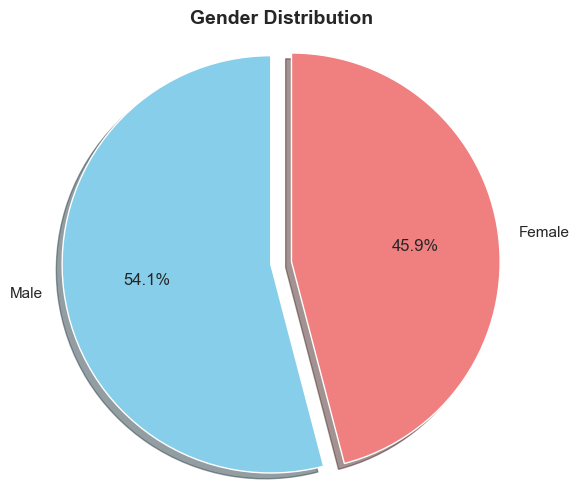

In [214]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index  # Get labels (Male, Female)

# Pie chart with beautifications
plt.figure(figsize=(6, 6))  # Set figure size
explode = (0.1, 0)  # Explode first slice
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, shadow=True, explode=explode)
plt.title('Gender Distribution', fontweight='bold', fontsize=14)  # Set title with custom font weight and size
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


**Insights**: Since We see this dataset shows a slightly higher proportion of male policyholders (54.1%) compared to female policyholders (45.9%). This indicates that, in this specific dataset, males are marginally more likely to be policyholders for the insurance company

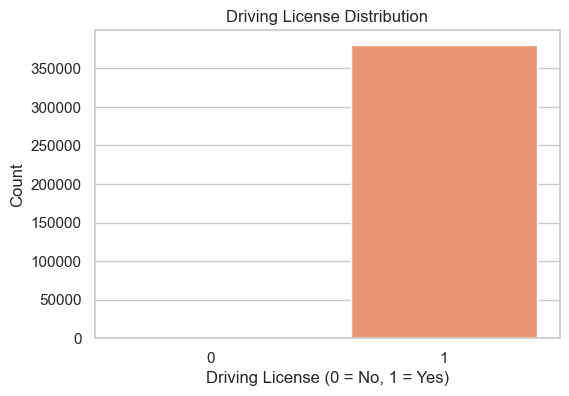

In [215]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_License', data=df, palette='Set2')
# Plots the count of Driving_License values (0 = No, 1 = Yes).
# palette='Set2': Uses a predefined color palette for the plot

plt.title('Driving License Distribution')
plt.xlabel('Driving License (0 = No, 1 = Yes)')
plt.ylabel('Count')
# plt.title(), plt.xlabel(), plt.ylabel(): Adds the title and labels for x and y axes.

plt.show()


**Insight**: The graph shows that a vast majority of the population in the dataset possesses a driving license.The bar representing individuals with licenses is significantly taller than the bar for those without.

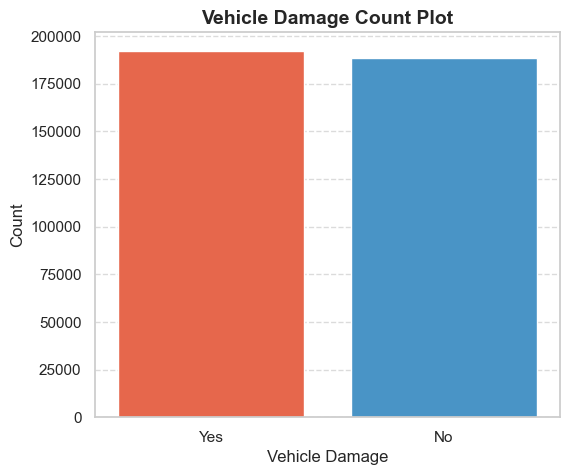

In [216]:
plt.figure(figsize=(6, 5))  # Adjust figure size
sns.countplot(x='Vehicle_Damage', data=df,palette=['#FF5733', '#3498DB'])  # Custom colors
plt.title("Vehicle Damage Count Plot", fontsize=14, fontweight='bold')  # Improve title styling
plt.xlabel("Vehicle Damage", fontsize=12)  # Label x-axis
plt.ylabel("Count", fontsize=12)  # Label y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


Customers with past vehicle damage ("Yes") is around 190,000+ customers.
Customers without past vehicle damage ("No") is around 180,000+ customers.

**Insight**: Customers who have previously had vehicle damage might be more inclined to buy insurance since they understand the risks.

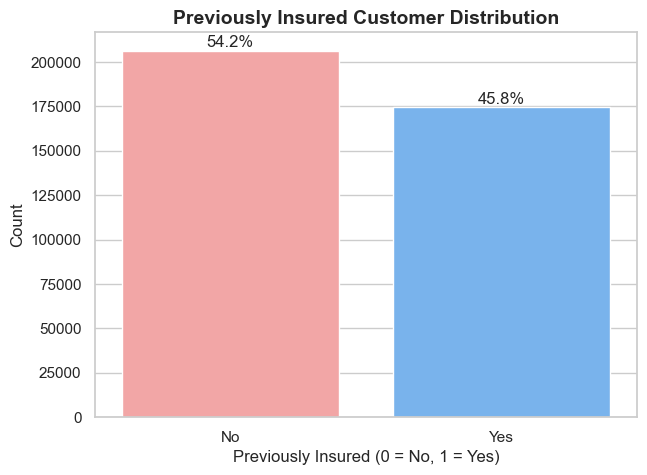

In [217]:
# Count plot for Previously_Insured
plt.figure(figsize=(7,5))
sns.countplot(x='Previously_Insured', data=df, palette=['#ff9999','#66b3ff'])

# Beautifications
plt.title("Previously Insured Customer Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Previously Insured (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0,1], labels=["No", "Yes"])  # Renaming labels for clarity

# Display percentage on top of bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 2000, f'{height/total:.1%}', 
             ha='center', fontsize=12)

plt.show()

 More than Half of the Customers Were Not Previously Insured (54.2%).
 A Significant Number of Customers Were Previously Insured (45.8%).
 
 **Insight**: 54.2% of the customers might be first-time buyers, which means they need more education on insurance benefits and 45.8% of the customers might be looking for renewals, better offers, or switching providers.

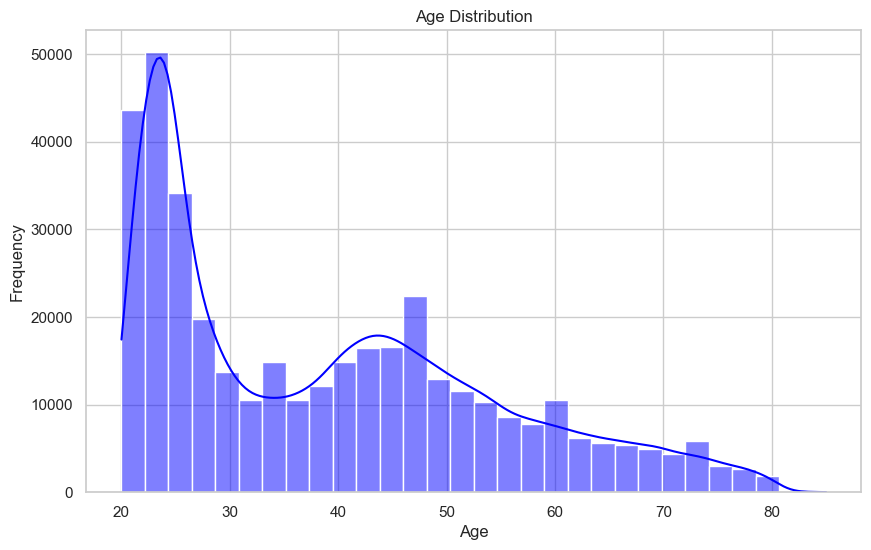

In [218]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))       # Sets the plot size to 10x6 inches

sns.histplot(df['Age'],bins = 30,kde = True,color = 'blue') #bins=30: Divides the data into 30 bins.
#kde=True: Adds a KDE curve to visualize the distribution , color='blue': Sets the color of the plot to blue

plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
# Adds a title, x-axis label, and y-axis label.
plt.show()

The chart indicates that the majority of individuals in the dataset are in their 20s and 30s.

 The distribution is skewed to the right, which means that there are more younger individuals than older individuals.

**Insight**: As age increases, the frequency of individuals decreases. This is a common trend in many datasets, indicating that people are less likely to be represented in the data as they get older. 

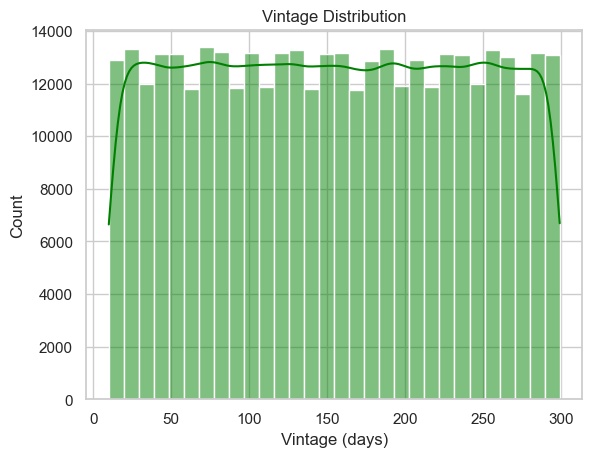

In [219]:
sns.histplot(df['Vintage'],bins = 30,kde = True, color = 'green')
plt.title("Vintage Distribution")
plt.xlabel("Vintage (days)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Most vintage groups have between 11,000 to 13,000 cases, showing relatively stable numbers across different periods.

**Insight**:  The data shows a relatively uniform distribution with some fluctuations, suggesting consistent vintage periods across the dataset.

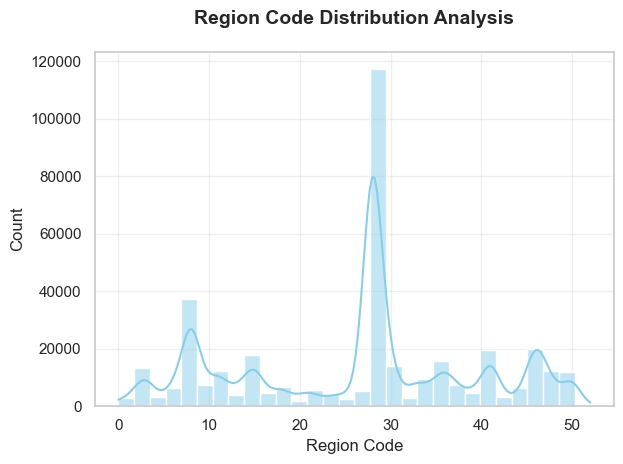

In [220]:
# Create plot
ax = sns.histplot(data=df['Region_Code'], bins=30, kde=True, color='skyblue')

# Customize
plt.title("Region Code Distribution Analysis", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Region Code", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Format axis
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

**Insight**: The graph shows an uneven distribution of Region Codes. A region code around 30 has the highest frequency, while other regions have varying levels of representation.

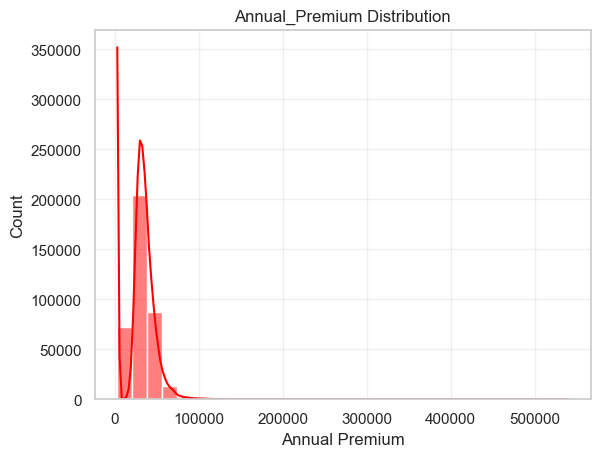

In [221]:
sns.histplot(df['Annual_Premium'],bins=30,kde = True, color = 'red')
plt.title('Annual_Premium Distribution')
plt.xlabel("Annual Premium", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

**Insight**: The graph shows a right-skewed distribution of Annual Premiums. This means most premiums are lower, with a few policies having much higher premiums.

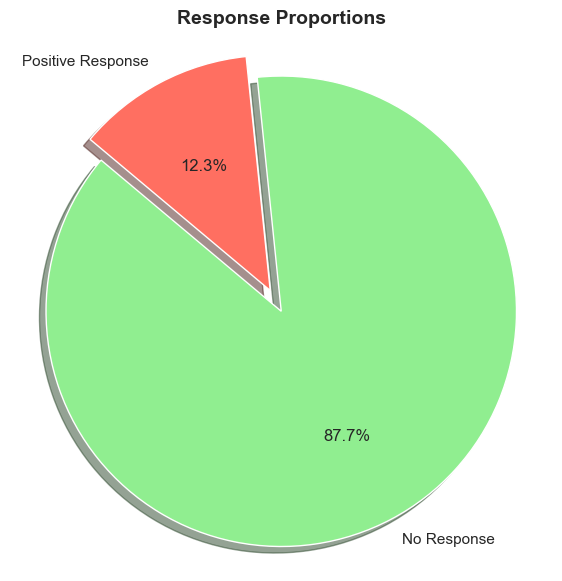

In [222]:
# Count of responses
response_counts = df['Response'].value_counts()

# Define labels & colors
labels = ['No Response', 'Positive Response']
colors = ['#90EE90', '#FF6F61']  # Soft pastel green and coral
explode = (0.1, 0) 
# Create pie chart with enhancements
plt.figure(figsize=(7, 7))
plt.pie(response_counts,labels=labels, autopct='%1.1f%%',colors=colors, startangle=140, shadow=True, explode=explode) 
# Make the title bold
plt.title('Response Proportions', fontsize=14, fontweight='bold')                                   
plt.axis('equal')  # Ensures the pie chart is circular
# Show chart
plt.show()


**Insight**: 

87.7% of customers did not respond to the insurance offer.

Only 12.3% of customers showed a positive response.

This indicates a low engagement rate with the offer.

## Bivariate Analysis

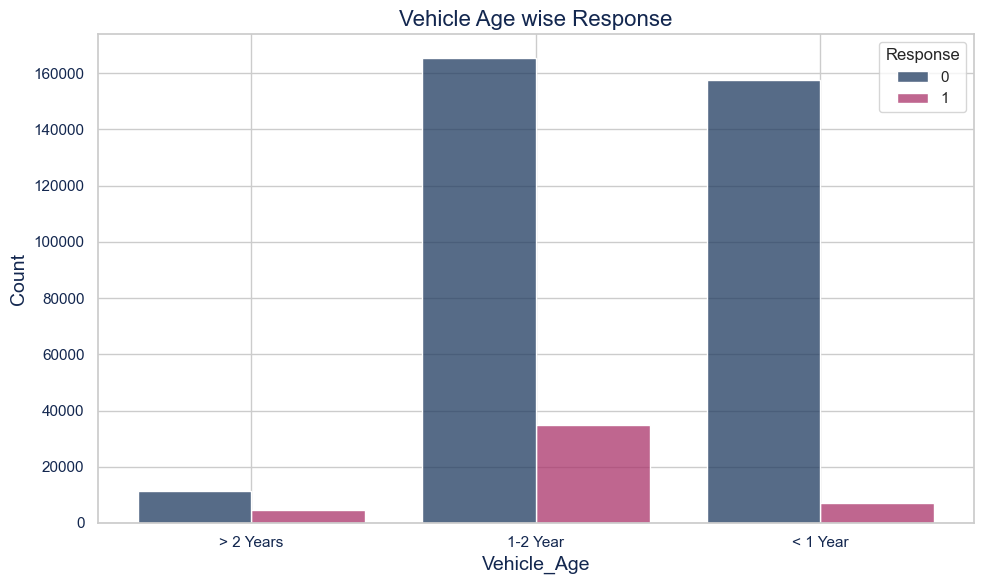

In [223]:
# Define a custom dark color palette
dark_palette = ['#1e3a5f', '#AA336A', '#D8BFD8'] # A dark color palette is defined for the bars.

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram using seaborn
sns.histplot(
    data=df,
    x='Vehicle_Age',
    hue='Response',
    palette=dark_palette,
    multiple='dodge',  # Ensure bars for each group are separated
    shrink=0.8,  # Adjust bar width
    ax=ax
)
#X-axis: Vehicle_Age.
#Bars colored by Vehicle_Age categories.
#Bars are separated (multiple='dodge') and resized (shrink=0.8).

# Customize the plot
ax.set_title('Vehicle Age wise Response', fontsize=16, color='#13274F')
ax.set_xlabel('Vehicle_Age', fontsize=14, color='#13274F')
ax.set_ylabel('Count', fontsize=14, color='#13274F')

# Customize tick labels' colors
ax.tick_params(axis='x', colors='#13274F')
ax.tick_params(axis='y', colors='#13274F')

# Adjust layout for margins
plt.tight_layout()    #tight_layout adjusts margins to avoid overlaps.

# Show the plot
plt.show()  #the plot is displayed using plt.show().

The tallest bar(1-2 years) represents the highest concentration of vehicles in this age group.
 
The smallest bar(>2 years) indicates a lower number of vehicles that are older than 2 years.

**Insight**:  The 1-2 Year category shows a higher number of both interested and not interested customers, suggesting this age range may represent a larger pool of potential customers for insurance.

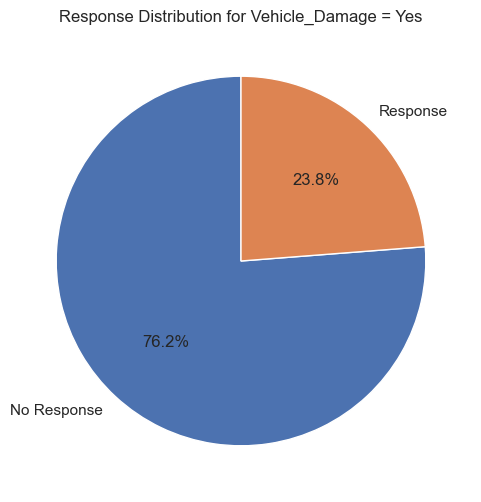

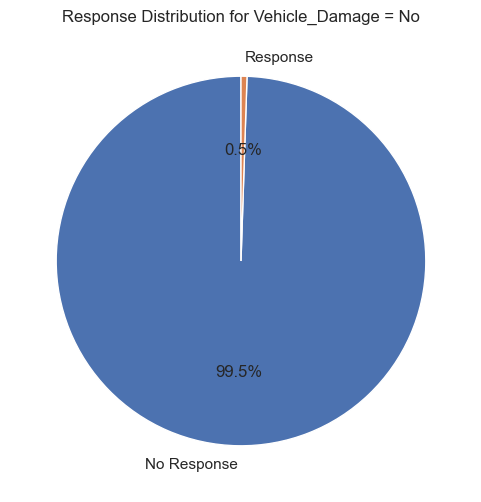

In [224]:
for category in df['Vehicle_Damage'].unique():
    subset = df[df['Vehicle_Damage'] == category]
    subset['Response'].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        labels=['No Response', 'Response'],  # Customize labels
        figsize=(6, 6),
    )
    plt.title(f'Response Distribution for Vehicle_Damage = {category}')
    plt.ylabel('')  # Remove the y-axis label for a cleaner look
    plt.show() 

When there is vehicle damage, a significantly higher proportion of customers (23.8%) responded.
                                                                              
When there is no vehicle damage, only a very small proportion (0.5%) of customers responded.

**Insight**: The charts suggest that customers are more likely to respond when they have experienced vehicle damage.

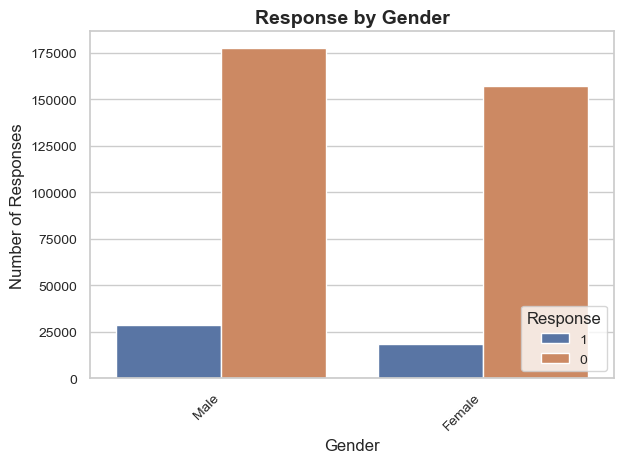

In [225]:
# Convert 'Response' column to string to avoid numeric label issues
df['Response'] = df['Response'].astype(str)

# Create the stacked bar chart
ax = sns.countplot(x='Gender', hue='Response', data=df)

# Customize chart elements for improved aesthetics
plt.title('Response by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Add a legend and customize it
plt.legend(title='Response', title_fontsize=12, fontsize=10, loc='lower right')

# Adjust layout for better visualization
plt.tight_layout()

plt.show()


 The count of male respondents is significantly higher than female respondents. 

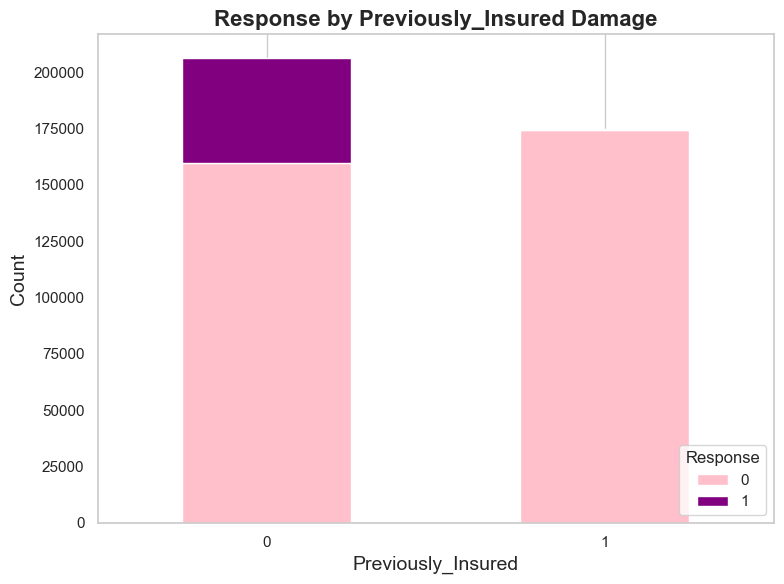

In [226]:
ct = pd.crosstab(df['Previously_Insured'], df['Response'])

# Plot the cross tabulation as a stacked bar chart
ct.plot(kind='bar', stacked=True, color=['pink', 'purple'], figsize=(8, 6))

# Customize the plot
plt.title('Response by Previously_Insured Damage', fontsize=16, fontweight='bold')
plt.xlabel('Previously_Insured', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Response', loc='lower right')
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()

**Insight**: When the customers have previously insured their damage , They are not responding Whereas when the customers are not previously insured there is some customers who are responding to the insurance policy.

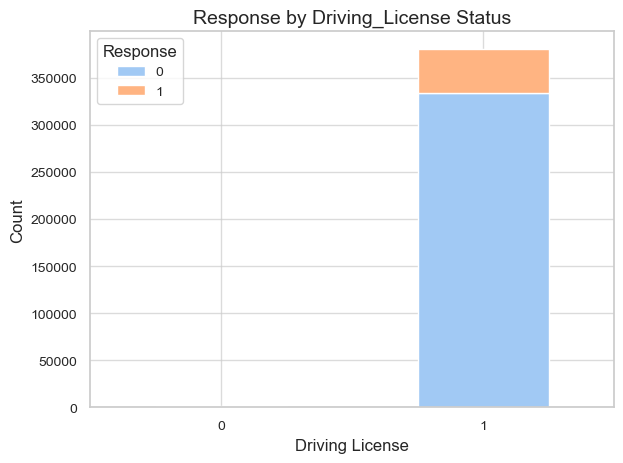

In [227]:
sns.set_palette("pastel")

# Create the crosstab plot
pd.crosstab(df['Driving_License'], df['Response']).plot(kind='bar', stacked=True)
plt.title('Response by Driving_License Status', fontsize=14)
plt.xlabel('Driving License', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10) 
plt.yticks(fontsize=10)
plt.legend(title='Response', fontsize=10) 
plt.grid(True, alpha=0.7)  # Add a subtle grid
plt.tight_layout()  # Improve spacing
plt.show()

**Insight**: Almost all the customers have driving license but a very few are responding.

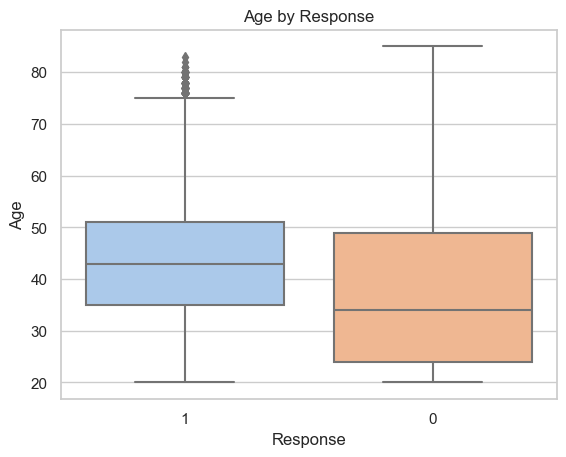

In [228]:
sns.boxplot(data=df, x='Response', y='Age')
plt.title('Age by Response')
plt.show() 

The graph shows the distribution of age for two different groups represented by 'Response' 0 and 1.

The median age for Response 0 is around 30, while the median age for Response 1 is around 45.

**Insight**: The spread of ages is higher for Response 1 than Response 0. The outliers for Response 1 indicate a wider age range compared to Response 0.

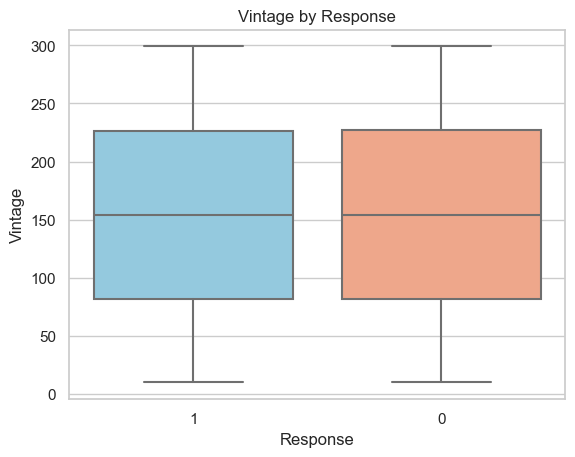

In [229]:
sns.boxplot(x='Response', y='Vintage', data=df, palette=['skyblue', 'lightsalmon'])
plt.title('Vintage by Response')
plt.show()

The median vintage for category 0 is around 150.

The median vintage for category 1 is slightly higher, around 170.

**Insight**: This graph suggests that the 'Vintage' variable is potentially a strong predictor of Response.

## Multivariate 

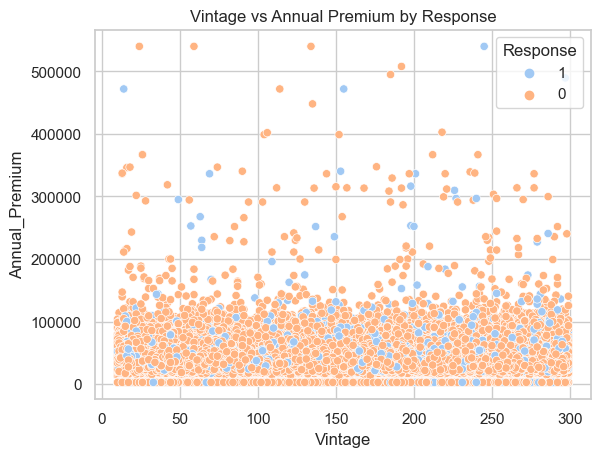

In [230]:
sns.scatterplot(data=df, x='Vintage', y='Annual_Premium', hue='Response')
plt.title('Vintage vs Annual Premium by Response')
plt.show()

**Insight**: Majority of the responses are coming from the customers whose annual insurace is less than 200000 reagrdless of the vintage

## Correlation

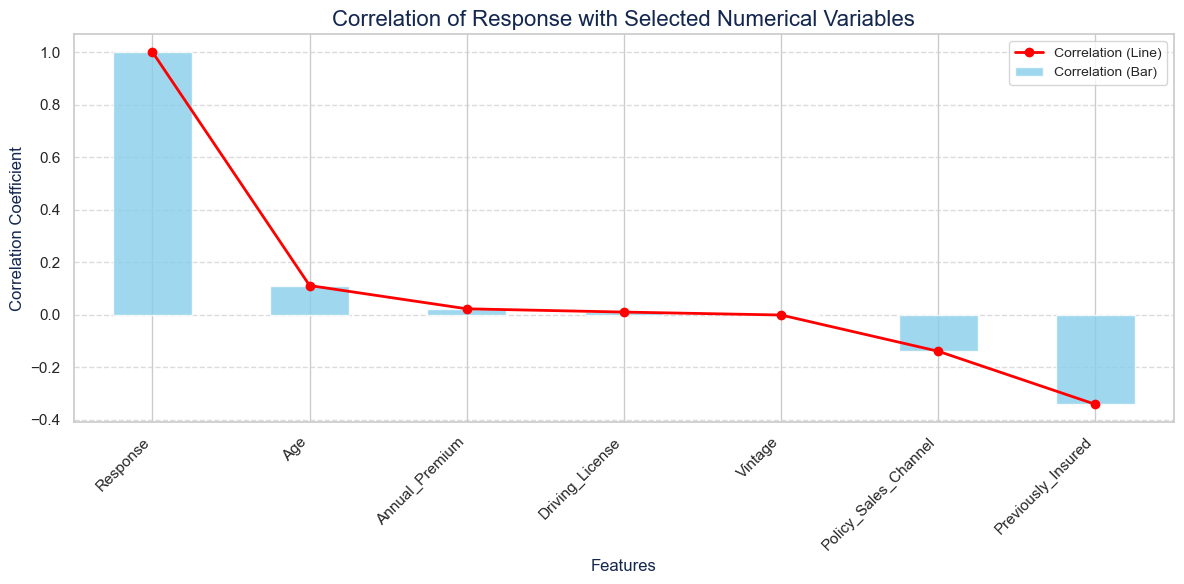

In [231]:
# Define the selected numerical columns
selected_columns = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

# Compute correlations only for the selected columns
correlations = df[selected_columns].corr()['Response'].sort_values(ascending=False)

# Plot the correlation graph
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar', color='skyblue', alpha=0.8, label='Correlation (Bar)')   # Bar plot
plt.plot(correlations.index, correlations.values, color='red', marker='o', linewidth=2, label='Correlation (Line)')  # Line plot

# Customize chart aesthetics
plt.title('Correlation of Response with Selected Numerical Variables', fontsize=16, color='#13274F')
plt.xlabel('Features', fontsize=12, color='#13274F')
plt.ylabel('Correlation Coefficient', fontsize=12, color='#13274F')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid overlap

# Show the plot
plt.show()


Key Positive Correlation: Age - Older customers are slightly more likely to respond.

Key Negative Correlation: Previously insured customers are much less likely to respond.

Sales Channel Impact: Slight negative correlation—some channels might be ineffective.

Driving License, Vintage, Annual Premium, and Policy Sales Channel have weak or negligible correlation.

### Encode Categorical Variable

In [248]:
df = pd.get_dummies(df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

In [249]:
# Define Features and Target
y = df["Response"]
x = df.drop(columns=["Response"])

## Splitting the data

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [251]:
# Feature Scaling AFTER Split
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

In [252]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase minority class samples
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Model Building 

**Built 3 models** : 
1. Logistic Regression
2. Random Forest
3. Decision Trees

## Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85     33440
           1       0.31      0.77      0.44      4671

    accuracy                           0.76     38111
   macro avg       0.63      0.76      0.64     38111
weighted avg       0.88      0.76      0.80     38111



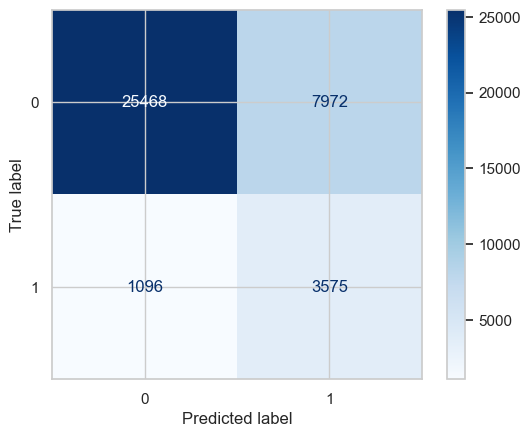

In [254]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = log_reg.predict(x_test)
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]  # Probability scores for ROC-AUC

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap="Blues", colorbar=True)
plt.show()


**Insights**: 
Classification Report:
* Precision: 0.96 (96% of predicted negatives are actually negative)

* Recall: 0.76 (76% of actual negatives were caught)

* F1-score: 0.80, indicating reasonably good overall performance
  
* Accuracy: 76% of all predictions are correct


* The model processed 38,111 total cases

Confusion Matrix :

* True Negatives (0,0): 25,468 cases - correctly identified negative cases

* False Positives (0,1): 7,972 cases - incorrectly flagged as positive

* False Negatives (1,0): 1,096 cases - missed positive cases

* True Positives (1,1): 3,575 cases - correctly identified positive cases

In [255]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy Score: 0.7620634462491144
Precision Score: 0.3096042262059409
Recall Score: 0.7653607364590024
F1 Score: 0.44086817116783816
ROC-AUC Score: 0.8409581055458757


**Insight**:
Accuracy Score (Overall):
This tells us the proportion of correct predictions (both true positives and true negatives) out of all predictions.

Precision Score (Focus on False Positives):
This means when the model predicts a positive case, it's only right 31% of the time.

Recall Score (Focus on False Negatives):
This means the model correctly identifies 77% of all actual positive cases.

F1 Score (Harmonic Mean of Precision and Recall):
F1 score is 0.44 or 44% This indicates an imbalance between precision and recall


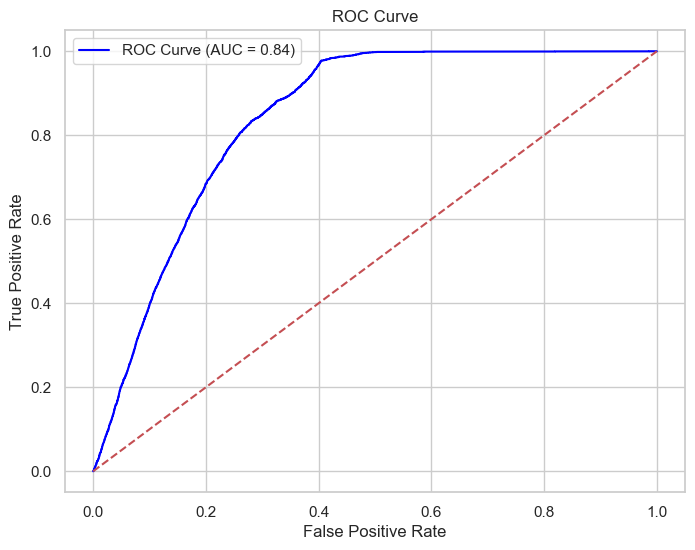

In [256]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     33440
           1       0.28      0.92      0.43      4671

    accuracy                           0.70     38111
   macro avg       0.63      0.80      0.62     38111
weighted avg       0.90      0.70      0.76     38111



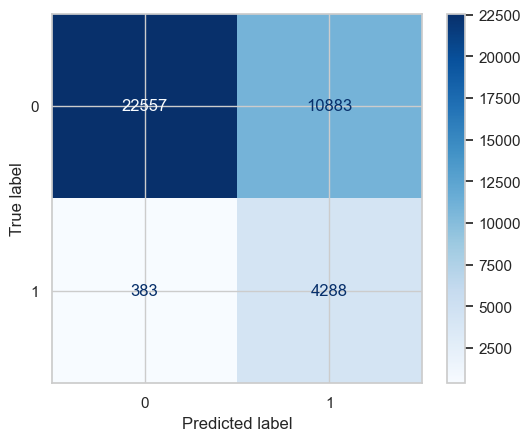

Accuracy Score: 0.7043898087166435
Precision Score: 0.2826445191483752
Recall Score: 0.9180047099122244
F1 Score: 0.43221449450660215
ROC-AUC Score: 0.8530289745902385


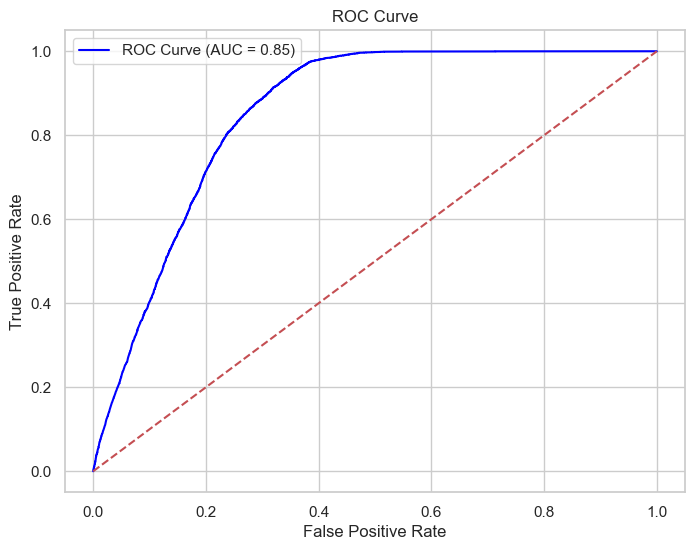

In [258]:

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', max_depth=10)
rf_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]  # Probability scores for ROC-AUC

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap="Blues", colorbar=True)
plt.show()

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Insight**:
Accuracy: 70.4% of all predictions are correct

ROC-AUC Score: 0.853 (85.3%), indicating good discriminative ability

**For Class 0 (Majority Class)**:

Precision: 98% (very high - when it predicts 0, it's almost always right)

Recall: 67% (moderate - catches about two-thirds of actual negatives)

F1-score: 80% (good balance between precision and recall).

**For Class 1 (Minority Class)**:

Precision: 28.3% (when it predicts class 1, it's right only 28.3% of the time)

Recall: 91.8% (excellent - catches 91.8% of actual positive cases)

F1-score: 43.2% (lower due to precision-recall trade-off).

**Confusion Matrix Analysis**:

* True Negatives (0,0): 22,557 cases - correctly identified negative cases.
  
* False Positives (0,1): 10,883 cases - incorrectly flagged as positive.
  
* False Negatives (1,0): 383 cases - missed positive cases.
  
* True Positives (1,1): 4,288 cases - correctly identified positive cases.

**ROC Curve Interpretation**:

* AUC (Area Under Curve) = 0.85, indicating strong discriminative ability.
  
* The curve shows significant lift above the diagonal random line.
  
* Sharp initial rise indicates good prediction capability at stricter thresholds.
  
* Curve plateaus around 0.4 FPR, suggesting diminishing returns after this point. 

## Decision Tree 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82     33440
           1       0.29      0.86      0.44      4671

    accuracy                           0.73     38111
   macro avg       0.63      0.79      0.63     38111
weighted avg       0.89      0.73      0.77     38111



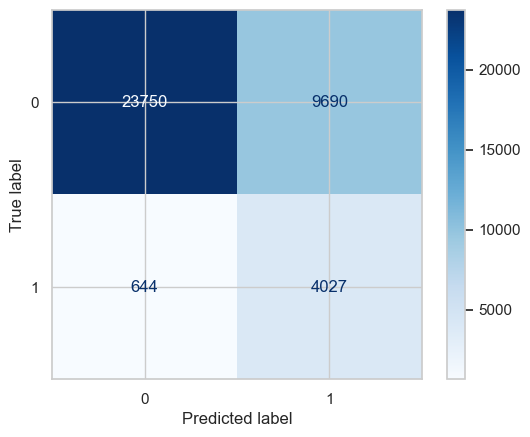

Accuracy Score: 0.7288446905093018
Precision Score: 0.2935773128235037
Recall Score: 0.8621280239777349
F1 Score: 0.4380030454644333
ROC-AUC Score: 0.840420298589792


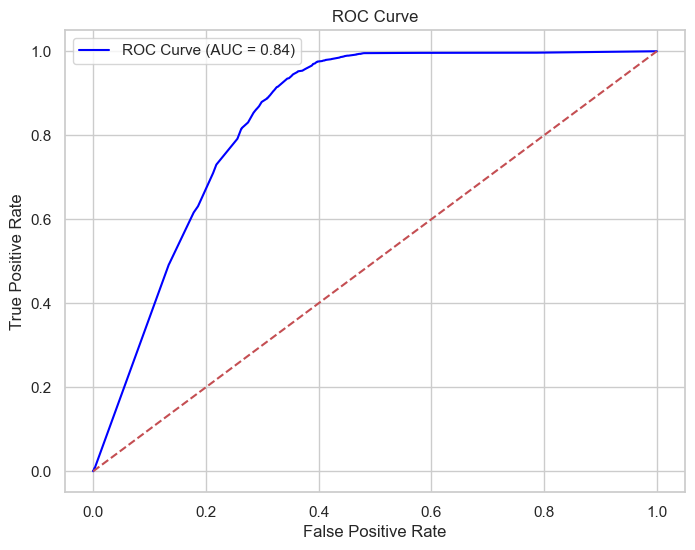

In [182]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced')
dt_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = dt_model.predict(x_test)
y_pred_proba = dt_model.predict_proba(x_test)[:, 1]  # Probability scores for ROC-AUC

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap="Blues", colorbar=True)
plt.show()

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Insights**:

**Overall Performance Metrics**:

* Accuracy: 72.9% (higher than random forest at 70.4%)

* ROC-AUC Score: 0.840 (slightly lower than random forest's 0.853)
  
* F1 Score: 0.438 (very similar to random forest's 0.432)


**Classification Report**:

**For Class 0 (Majority Class)**:

* Precision: 97% (excellent - when predicting negative, very reliable)
  
* Recall: 71% (moderate - catches 71% of actual negatives)
  
* F1-score: 82% (good balance)

**For Class 1 (Minority Class)**:

* Precision: 29.4% (slightly better than random forest's 28.3%)
  
* Recall: 86.2% (lower than random forest's 91.8%)
  
* F1-score: 44% (slightly better than random forest)

**Confusion Matrix Breakdown**:

* True Negatives (0,0): 23,750 cases - correctly identified negative cases
  
* False Positives (0,1): 9,690 cases - incorrectly flagged as positive
  
* False Negatives (1,0): 644 cases - missed positive cases
  
* True Positives (1,1): 4,027 cases - correctly identified positive cases


**ROC Curve Analysis**:

* AUC = 0.84, indicating strong discriminative ability
  
* Curve shows steep initial ascent up to ~0.2 FPR
  
* Plateaus after ~0.4 FPR
  
* Significantly better than random (diagonal red line) 

# Conclusion 

This project aims to revolutionize customer engagement and sales efficiency within the insurance industry. By harnessing the power of machine learning, we will develop a predictive model that accurately forecasts customer responses to insurance policy offers. This model will empower the organization with valuable customer insights, enabling the optimization of sales channels and the implementation of highly targeted marketing strategies. Ultimately, this project will drive increased conversion rates and improve the overall efficiency and profitability of the policy sales process.


# **Key takeaways**:

* This project leverages machine learning for predictive modeling.
  
* The goal is to improve customer understanding and optimize sales strategies.
  
* Expected outcomes include improved targeting, channel optimization, and higher conversion rates.
